EXPLORATORY DATA ANALYSIS

In [194]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df=pd.read_csv('obesity_data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [196]:
print(df.shape)
print(df.columns.tolist())

(1000, 7)
['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel', 'ObesityCategory']


In [197]:
df.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

In [198]:
df.duplicated().sum()

np.int64(0)

In [199]:
for i in df.columns:
  print(f'Unique values of {i}: {df[i].nunique()}')
  print(f'{df[i].unique()}\n')

Unique values of Age: 62
[56 69 46 32 60 25 78 38 75 36 40 28 41 70 53 57 20 39 19 61 47 55 77 50
 29 42 66 44 76 59 45 33 79 64 68 72 74 54 24 26 35 21 31 67 43 37 52 34
 23 71 51 27 48 65 62 58 18 22 30 49 73 63]

Unique values of Gender: 2
['Male' 'Female']

Unique values of Height: 1000
[173.57526244 164.12730582 168.07220213 168.45963284 183.56856774
 166.40562726 183.56633382 142.87509508 183.47855781 182.97406115
 179.02254673 149.88081997 180.18886995 169.49880824 144.7066256
 182.98177708 184.44173079 150.95487928 171.75421075 183.88591121
 182.30161313 178.36061051 143.5274712  177.29542767 167.81896102
 179.95857529 172.56161458 169.8011839  176.40903849 168.28086629
 169.7572272  164.44776001 153.94591009 175.67853474 161.9396968
 167.99208134 172.86973958 149.14782356 151.38651096 167.00261423
 174.54563482 177.44038271 154.08685504 176.36631484 167.54930382
 161.16842755 163.51448144 178.01857332 172.74005785 170.50306523
 172.43495739 179.28097777 169.02900433 170.543188

In [200]:
df.drop('BMI',axis=1,inplace=True)
df.head()

,Age,Gender,Height,Weight,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,4,Normal weight
1,69,Male,164.127306,89.959256,2,Obese
2,46,Female,168.072202,72.930629,4,Overweight
3,32,Male,168.459633,84.886912,3,Overweight
4,60,Male,183.568568,69.038945,3,Normal weight


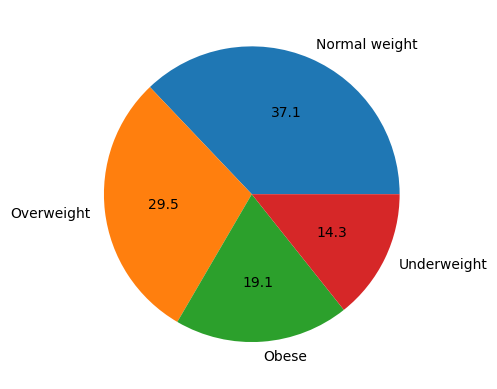

In [201]:
obesity_count=df['ObesityCategory'].value_counts()
plt.pie(obesity_count,labels=obesity_count.index,autopct='%.1f')
plt.savefig('plots/pie.png')
plt.show()

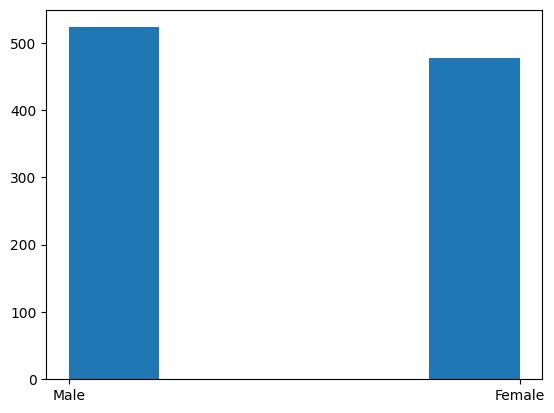

In [202]:
plt.hist(df['Gender'],bins=5)
plt.show()

In [203]:
from sklearn.preprocessing import LabelEncoder
label={}
for i in ['Gender','ObesityCategory']:
  encoder=LabelEncoder()
  df[i]=encoder.fit_transform(df[i].astype(str))
  label[i]=encoder

In [204]:
df.head()

,Age,Gender,Height,Weight,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,4,0
1,69,1,164.127306,89.959256,2,1
2,46,0,168.072202,72.930629,4,2
3,32,1,168.459633,84.886912,3,2
4,60,1,183.568568,69.038945,3,0


In [205]:
for i in df.columns:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR   #minimum threshold
  upper=Q3+1.5*IQR   #maximum threshold
  outlier=((df[i]<lower) | (df[i]>upper)).sum()
  if outlier:
    df[i]=df[i].clip(lower,upper)
  outlier=((df[i]<lower) | (df[i]>upper)).sum()
  print(f'{i}: {outlier} outliers')

Age: 0 outliers
Gender: 0 outliers
Height: 0 outliers
Weight: 0 outliers
PhysicalActivityLevel: 0 outliers
ObesityCategory: 0 outliers


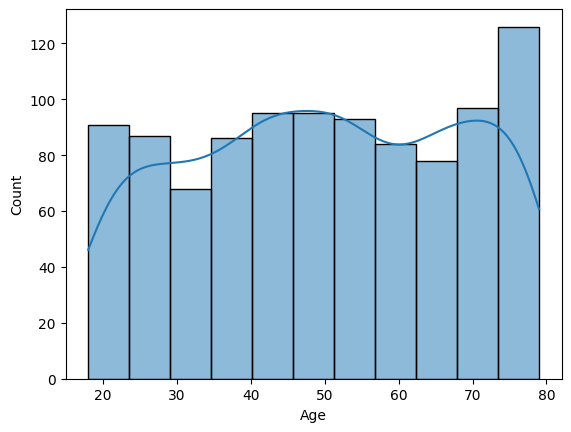

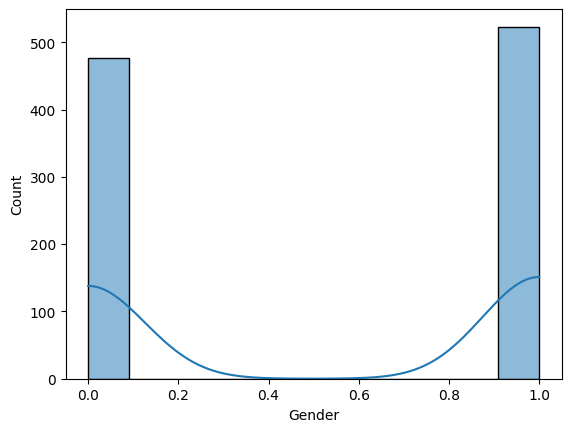

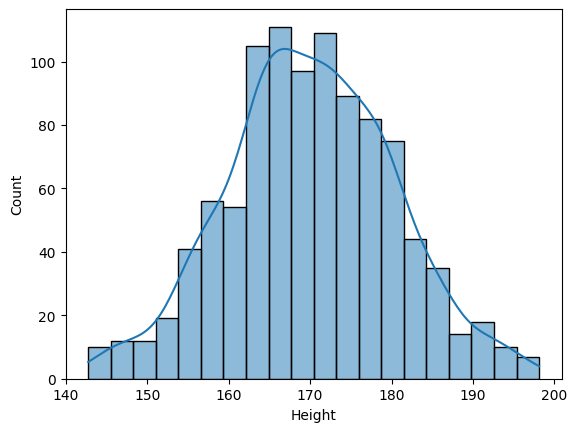

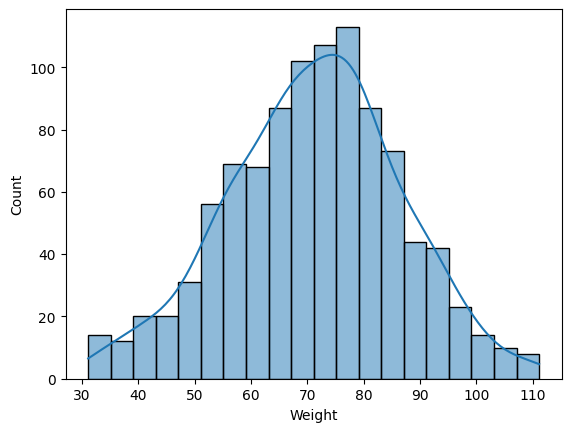

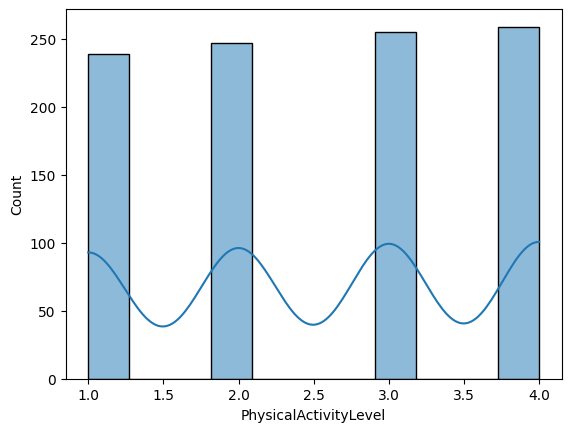

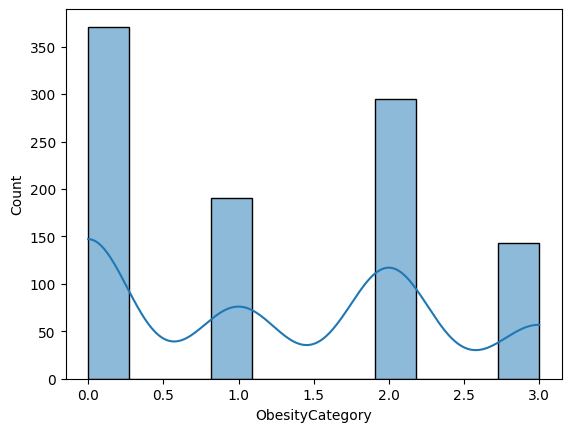

In [206]:
for i in df.columns:
  sns.histplot(df[i],kde=True)
  plt.savefig(f'plots/{i}.png')
  plt.show()

In [207]:
for i in df.columns:
  print(f'Skewness of {i}: ',df[i].skew())

Skewness of Age:  -0.06575522501530556
Skewness of Gender:  -0.0922359022863777
Skewness of Height:  0.011177735788196069
Skewness of Weight:  -0.10722623362544778
Skewness of PhysicalActivityLevel:  -0.042192482793889756
Skewness of ObesityCategory:  0.23536773473838424


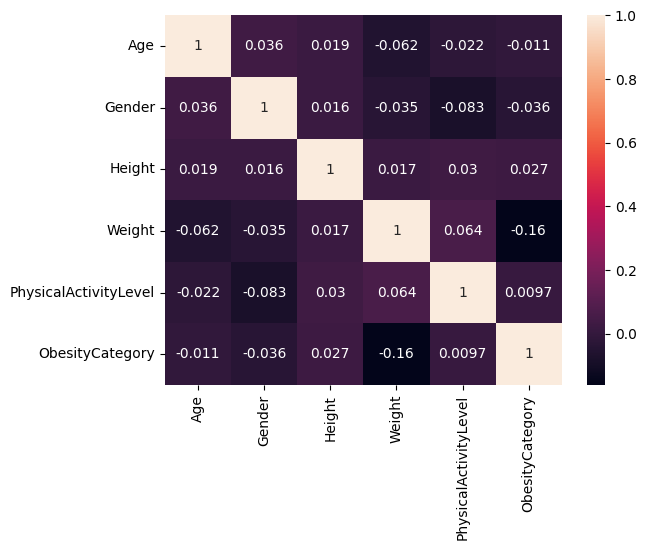

In [208]:
sns.heatmap(df.corr(),annot=True)
plt.show()

ML MODELS

In [209]:
X=df.drop('ObesityCategory',axis=1)
y=df['ObesityCategory']

In [210]:
y.value_counts(normalize=True)

ObesityCategory
0    0.371
2    0.295
1    0.191
3    0.143
Name: proportion, dtype: float64

In [211]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X,y=smote.fit_resample(X,y)

In [212]:
print(y.value_counts(normalize=True))

ObesityCategory
0    0.25
1    0.25
2    0.25
3    0.25
Name: proportion, dtype: float64


In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [215]:
models={
  'Logistic Regression': Pipeline([
    ('scaler',StandardScaler()),
    ('model',LogisticRegression())
  ]),

  'Naive Bayes': Pipeline([
    ('model', MultinomialNB())
  ]),

  'SVC': Pipeline([
    ('scaler',StandardScaler()),
    ('model',SVC())
  ]),

  'KNN': Pipeline([
    ('scaler',StandardScaler()),
    ('model',KNeighborsClassifier())
  ]),

  'Decision Tree': Pipeline([
    ('model',DecisionTreeClassifier())
  ]),

  'Random Forest': Pipeline([
    ('model',RandomForestClassifier())
  ]),

  'Xgboost': Pipeline([
    ('model',XGBClassifier())
  ]),
  
  'Gradient Boosting': Pipeline([
    ('model',GradientBoostingClassifier())
  ])
}

In [216]:
result={}
for name,pipeline in models.items():
  model=pipeline.fit(X_train,y_train)
  y_pred=model.predict(X_test)
 
  result[name]={
    'Accuracy': accuracy_score(y_test,y_pred),
    'Precision': precision_score(y_test,y_pred,average='weighted'),
    'Recall': recall_score(y_test,y_pred,average='weighted'),
    'f1': f1_score(y_test,y_pred,average='weighted')
  }

result_df=pd.DataFrame(result).T
result_df.sort_values(by='Accuracy',ascending=False)

,Accuracy,Precision,Recall,f1
Xgboost,0.976431,0.976664,0.976431,0.976475
Logistic Regression,0.966330,0.966951,0.966330,0.966111
Random Forest,0.959596,0.960926,0.959596,0.959869
Decision Tree,0.956229,0.956250,0.956229,0.956131
Gradient Boosting,0.949495,0.953481,0.949495,0.950219
SVC,0.936027,0.936862,0.936027,0.935512
KNN,0.838384,0.848300,0.838384,0.838875
Naive Bayes,0.713805,0.723376,0.713805,0.717422


In [217]:
param_grid={
    'best_model__n_estimators': [50, 100, 150],
    'best_model__max_depth': [3, 5, 7],
    'best_model__learning_rate': [0.01, 0.1, 0.2],
    'best_model__subsample': [0.8, 1],
}

pipe=Pipeline([
  ('best_model',XGBClassifier())
])

grid=GridSearchCV(estimator=pipe,param_grid=param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

y_pred_grid=grid.best_estimator_.predict(X_test)

print(f'Best parameters: {grid.best_params_}')
print(f'Accuracy: {accuracy_score(y_test,y_pred_grid)}')
print(f'Precision: {precision_score(y_test,y_pred_grid,average='weighted')}')
print(f'Recall: {recall_score(y_test,y_pred_grid,average='weighted')}')
print(f'f1: {f1_score(y_test,y_pred_grid,average='weighted')}')

Best parameters: {'best_model__learning_rate': 0.1, 'best_model__max_depth': 3, 'best_model__n_estimators': 100, 'best_model__subsample': 0.8}
Accuracy: 0.9663299663299664
Precision: 0.9680875728364312
Recall: 0.9663299663299664
f1: 0.9665945492268424


In [218]:
import pickle
with open('model.pkl','wb') as fp:
  pickle.dump(grid,fp)